In [1]:
import warnings
warnings.filterwarnings('ignore')

import torch
import pandas as pd
import numpy as np
import torchvision
import cv2
import pytorch_lightning as pl
import torchmetrics as tm
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from ZeroShotDataset import ZeroShotDataset
from params import *
from transformers import CLIPProcessor, CLIPModel
from LossFunc import *
from pytorch_lightning.callbacks import ModelCheckpoint, LearningRateMonitor
from torch.utils.data import random_split
from CLIPConditionedSegFormerModel import CLIPConditionedSegFormer

In [2]:
tests_params = {
    'Unseen' : {
        'filter_unseen' : True,
        'filter_seen' : False
    },
    'Seen' : {
        'filter_unseen' : False,
        'filter_seen' : True
    },
    'All' : {
        'filter_unseen' : False,
        'filter_seen' : False
    }
}

In [3]:
def test(model, params, dataset_params):
    dataset_params['filter_unseen'] = params['filter_unseen']
    dataset_params['filter_seen'] = params['filter_seen']
    ds = ZeroShotDataset(**dataset_params)

    loader = DataLoader(ds, batch_size=TrainParams.BATCH_SIZE, num_workers=1, shuffle=True, collate_fn=ds.collate_fn)
    trainer = pl.Trainer(accelerator='gpu', max_epochs=1)

    results = trainer.test(model, dataloaders=loader)
    return results

In [4]:
def test_model(model, dataset_params, tests_params):
    df = pd.DataFrame(columns=['test', 'acc', 'dice', 'miou', 'f1'])
    for test_name, params in tests_params.items():
        results = test(model, params, dataset_params)
        df = df.append({
            'test' : test_name,
            'acc' : results[0]['test_acc'],
            'dice' : results[0]['test_dice'],
            'miou' : results[0]['test_iou'],
            'f1' : results[0]['test_f1'],
        }, ignore_index=True)

    return df

In [5]:
clip_processor = CLIPProcessor.from_pretrained('openai/clip-vit-base-patch16')

In [6]:
model = CLIPConditionedSegFormer()
model.load_state_dict(torch.load("lightning_logs/version_23/checkpoints/transformer-epoch=16-val_loss=0.337-val_iou=0.32.ckpt")["state_dict"])
model = model.eval()

In [7]:
df = pd.read_csv('ProcessedDatasetStuff512/csv/val.csv')

In [8]:
dataset_params = {
    'df': df,
    'image_folder': TrainParams.DATASET_IMAGE_FOLDER_VAL,
    'mask_folder': TrainParams.DATASET_MASK_FOLDER_VAL,
    'image_size': TrainParams.IMAGE_DIM,
    'mask_size': TrainParams.MASK_SIZE,
    'templates': ['{}'],
    'unseen_classes': TrainParams.UNSEEN_CLASSES, 
    'image_processor': clip_processor, 
    'tokenizer': clip_processor.tokenizer
}

In [9]:
test_df = test_model(model, dataset_params, tests_params)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.8257588148117065     │
│         test_dice         │    0.6002703309059143     │
│          test_f1          │    0.8257588148117065     │
│         test_iou          │    0.27463334798812866    │
└───────────────────────────┴───────────────────────────┘

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.8766450881958008     │
│         test_dice         │    0.5877683758735657     │
│          test_f1          │    0.8766452670097351     │
│         test_iou          │    0.2921999394893646     │
└───────────────────────────┴───────────────────────────┘

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.8714910745620728     │
│         test_dice         │    0.5927752256393433     │
│          test_f1          │    0.8714910745620728     │
│         test_iou          │    0.2870117425918579     │
└───────────────────────────┴───────────────────────────┘

In [ ]:
unseen_ds_params = dataset_params.copy()
unseen_ds_params['filter_unseen'] = True
unseen_ds_params['filter_seen'] = False
unseen_ds = ZeroShotDataset(**unseen_ds_params)
unseen_loader = DataLoader(unseen_ds, batch_size=TrainParams.BATCH_SIZE, shuffle=True, collate_fn=unseen_ds.collate_fn)

torch.Size([8, 3, 512, 512]) torch.Size([8, 3, 224, 224]) torch.Size([8, 3]) torch.Size([8, 1, 128, 128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<|startoftext|>tree <|endoftext|>


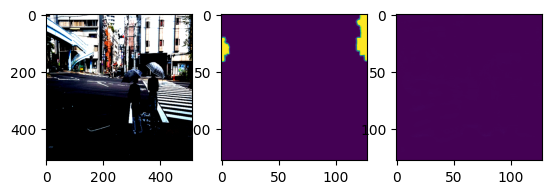

In [53]:
x, x_c, condition, y = next(iter(unseen_loader))
# condition = condition.unsqueeze(0)
print(x.shape, x_c.shape, condition.shape, y.shape)
# condition = clip_processor.tokenizer.encode("a photo of a tv")
# condition = torch.tensor(condition).long()
# pred = model(x.unsqueeze(0), x_c.unsqueeze(0), condition.unsqueeze(0))
pred = model(x, x_c, condition)
pred = torch.sigmoid(pred)

# decode condition
condition = condition[0].detach().cpu().numpy()

condition = clip_processor.tokenizer.decode(condition)
print(condition)

image = x[0]
mask = y[0]

plt.subplot(1, 3, 1)
plt.imshow(image.permute(1, 2, 0))
plt.subplot(1, 3, 2)
plt.imshow(mask[0], vmin=0, vmax=1)
plt.subplot(1, 3, 3)
plt.imshow(pred[0][0].detach().numpy(), vmin=0, vmax=1)